In [ ]:
# !import networkx
# !import matplotlib

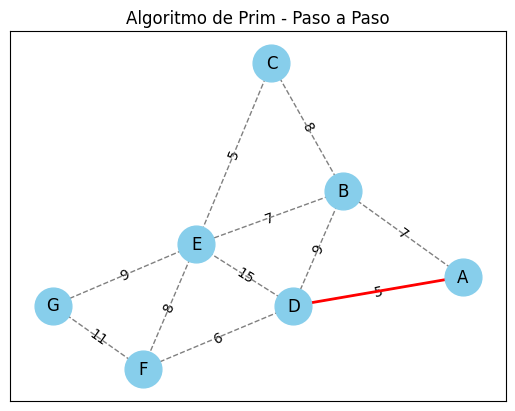

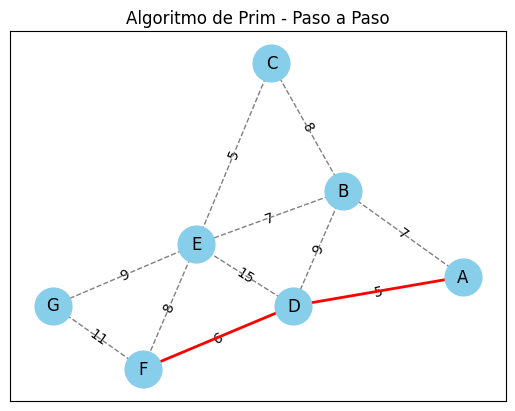

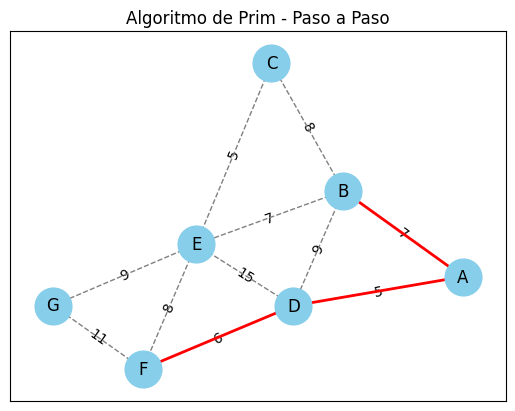

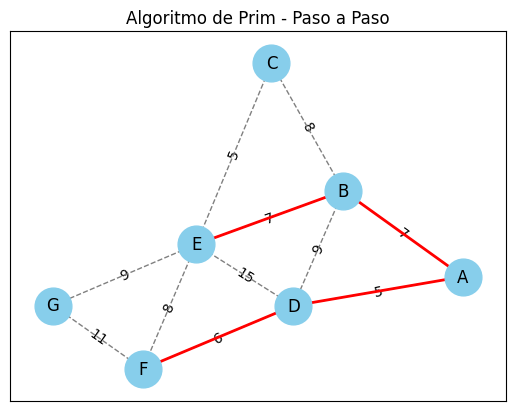

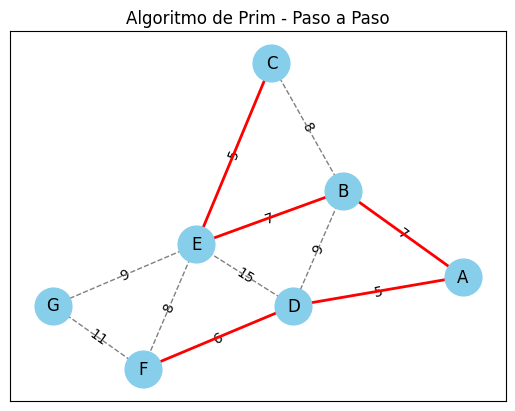

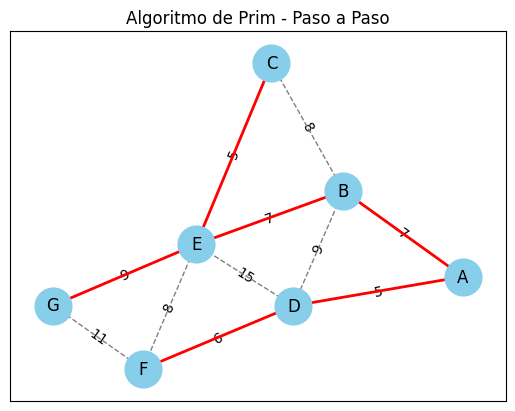

--------------------------------------------------------------


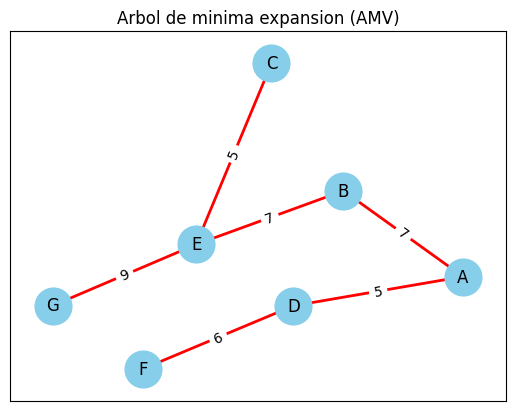

Costo total del arbol de expansion minima (AMV): 39


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def dibujar_grafo_completo(grafo, posiciones, aristas_en_amv=None):

    # grafo inicial con todos los nodos y aristas
    nx.draw_networkx_nodes(grafo, posiciones, node_color='skyblue', node_size=700)
    nx.draw_networkx_labels(grafo, posiciones)
    nx.draw_networkx_edge_labels(grafo, posiciones, edge_labels=nx.get_edge_attributes(grafo, 'weight'))

    nx.draw_networkx_edges(grafo, posiciones, edge_color='gray', style='dashed')

    # resalta las aristas que estan en el AMV
    if aristas_en_amv:
        nx.draw_networkx_edges(grafo, posiciones, edgelist=aristas_en_amv, edge_color='red', width=2)
    
    plt.title("Algoritmo de Prim - Paso a Paso")
    plt.show()

def dibujar_grafo_final(grafo, posiciones, aristas_en_amv):
    nx.draw_networkx_nodes(grafo, posiciones, node_color='skyblue', node_size=700)
    nx.draw_networkx_labels(grafo, posiciones)
    nx.draw_networkx_edges(grafo, posiciones, edgelist=aristas_en_amv, edge_color='red', width=2)
    nx.draw_networkx_edge_labels(grafo, posiciones, edge_labels={arista: grafo.edges[arista]['weight'] for arista in aristas_en_amv})

    plt.title("Arbol de minima expansion (AMV) - VERSION FINAL")
    plt.show() 

def algoritmo_prim(grafo, nodo_inicial):
    amv = nx.Graph()
    amv.add_node(nodo_inicial)
    aristas_en_amv = []
    posiciones = nx.spring_layout(grafo)
    costo_total = 0

    while len(amv.nodes) < len(grafo.nodes):
        # encontrar la arista de menor peso que conecta el AMV con un nodo no incluido
        aristas_frontera = []
        for nodo in amv.nodes:
            for vecino in grafo.neighbors(nodo):
                if vecino not in amv.nodes:
                    aristas_frontera.append((nodo, vecino, grafo.edges[nodo, vecino]['weight']))

        # ordena las aristas por peso
        aristas_frontera.sort(key=lambda x: x[2])
        # selecciona la arista con menor peso
        siguiente_arista = aristas_frontera[0]
        amv.add_edge(siguiente_arista[0], siguiente_arista[1], weight=siguiente_arista[2])
        aristas_en_amv.append((siguiente_arista[0], siguiente_arista[1]))
        costo_total += siguiente_arista[2]
        
        # muestra el grafo con el AMV actual
        dibujar_grafo_completo(grafo, posiciones, aristas_en_amv)
        
        # añade el nuevo nodo al AMV
        amv.add_node(siguiente_arista[1])
        
    print("--------------------------------------------------------------")
    # muestra el AMV final
    dibujar_grafo_final(amv, posiciones, aristas_en_amv)

    return amv, costo_total

G = nx.Graph()
G.add_edges_from([
    ("A", "B", {'weight': 7}),
    ("A", "D", {'weight': 5}),
    ("D", "B", {'weight': 9}),
    ("B", "C", {'weight': 8}),
    ("B", "E", {'weight': 7}),
    ("C", "E", {'weight': 5}),
    ("D", "E", {'weight': 15}),
    ("D", "F", {'weight': 6}),
    ("F", "E", {'weight': 8}),
    ("F", "G", {'weight': 11}),
    ("E", "G", {'weight': 9})
])
amv_final, costo_total = algoritmo_prim(G, 'A')
print("Costo total del arbol de expansion minima (AMV):", costo_total)
